In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from collections import Counter
from collections import defaultdict

In [2]:
df_train = pd.read_csv('train_V2.csv', encoding='utf-8')
train_data = df_train.to_dict('records')
df_train.head(5)

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


## EDA

Group data by matchId.

In [3]:
match_idx_dict = defaultdict(lambda: [])

for i in range(len(train_data)):
    match_idx_dict[train_data[i]['matchId']].append(i) 

Match statistics.

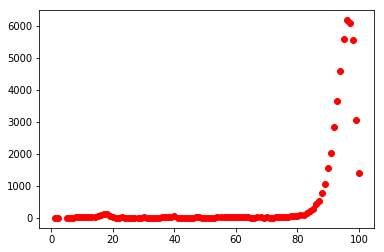

In [4]:
num_players_dict = defaultdict(int)
for indices in match_idx_dict.values():
    num_players_dict[len(indices)] += 1
    
plt.plot(num_players_dict.keys(), num_players_dict.values(), 'ro')

Take relevant columns to explore.

In [5]:
print(df_train.columns)

Index([u'Id', u'groupId', u'matchId', u'assists', u'boosts', u'damageDealt',
       u'DBNOs', u'headshotKills', u'heals', u'killPlace', u'killPoints',
       u'kills', u'killStreaks', u'longestKill', u'matchDuration',
       u'matchType', u'maxPlace', u'numGroups', u'rankPoints', u'revives',
       u'rideDistance', u'roadKills', u'swimDistance', u'teamKills',
       u'vehicleDestroys', u'walkDistance', u'weaponsAcquired', u'winPoints',
       u'winPlacePerc'],
      dtype='object')


In [6]:
rel_cols = set(df_train.columns)
rel_cols.remove('Id')
rel_cols.remove('groupId')
rel_cols.remove('matchId')
rel_cols.remove('matchType')
rel_cols.remove('roadKills')
rel_cols.remove('weaponsAcquired')

In [7]:
df_train_minimized = pd.DataFrame()
for c in rel_cols:
    df_train_minimized[c] = df_train[c]

In [8]:
corr = df_train_minimized.corr()
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0, len(df_train_minimized.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(df_train_minimized.columns)
ax.set_yticklabels(df_train_minimized.columns)
plt.show()

In [ ]:
for c in rel_cols:
    df_train[c].hist()
    plt.title(c)
    plt.show()

Reduce range of x values so we can look at the data in more details.

## Baseline: logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
rel_cols.remove('winPlacePerc')

In [ ]:
def baseline_feature(datum):
    feature = []
    
    for c in rel_cols:
        feature.append(datum[c])
    
    feature.append(1) # offset

In [ ]:
X_train = [baseline_feature(d) for d in train_data]
y_train = [d['winPlacePerc'] for d in train_data]

In [ ]:
clf = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X_train, y_train)